# Seaborn

Seaborn is a statistical plotting library, built on top of matplotlib.
* It has beautiful default styles
* It is designed to work very well with pandas dataframe objects
* It is open source and hosted on GitHub - search on Google for the documentation

## Distribution of non-categorical (numerical) Plots

We are going to discuss different plot types with Seaborn that allow us to visualise the distribution of a Pandas Dataset. We will be looking at non-categorical data, ie data from columns that have only numbers in them.

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

**.load_dataset( ) : Seaborn comes with a few inbuilt datasets** that we can directly load. To do that, we use the `.load_dataset( )` method, and as an argument we pass the name of the inbuilt dataset we want to use, as a string.

Here, we will use one called **_tips_** and save it as a **dataframe** which we will also call _tips_ :

In [3]:
tips = sns.load_dataset('tips')

In [4]:
#Checking the head of the tips dataset:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### First numerical plot type: distplot

This plot allows us to show the distribution of a univariant set of observations. 

**Note**: Univariant = has only one variable

To use the distplot plot type, we use the `.distplot( )` method and as an argument we pass **a single column of our Dataframe**:

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

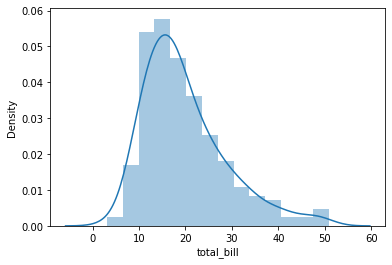

In [5]:
sns.distplot(tips['total_bill'])

**KDE and number of bins:**
* We get a histogram (a distribution of where the total bill lies) + a **kde = kernel denstity estimation** which is the plotted line. We can remove the KDE by passing a False argument when ploting the distplot. More about it after the rugplot section below
* **Number of bins** we can increase the number of bins by passing an argument bins = integer that usually depends on our dataset - we don't want to overdo it and plot every single instance of the dataset!
* We can get **just the KDE plot, not including the bins** by the method sns.kdeplot( )

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

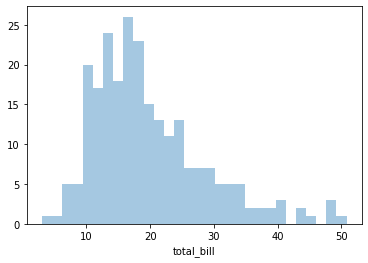

In [6]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

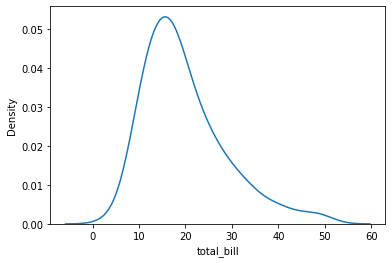

In [7]:
sns.kdeplot(tips['total_bill'])

### Second  numerical plot type: jointplot 

This plot allows us to match 2 distplots for byvariant data -- meaning to essentially combine 2 distplots

**Note**: Bivariant = has two variables

There is also a `kind` parameter that allows us to choose how we want to compare these 2 distributions

To use the distplot plot type, we use the `.jointplot( )` method:
* First we pass as arguments **the x and y variables** and then **the dataset/dataframe**. 
 * The dataframe/dataset is the data for the plot
 * The x and y are the 2 columns we want to compare, eg here, we want to compare the distribution of the total bill VS the tip size:
 * The kind parameter that affects what is happening within the plot in the middle that consists the essence of the jointplot. By default it is **scatter** but we can also pass in as an argument **hex** which allows to make a hexagon distribution representation - see the second plotting below. Another option is **reg** which is short for regression, which will essentially perform a linear fit to the scatter point data. Lastly, another option is **kde** which builds a 2D KDE, which essentially shows the density of where these points match up the most

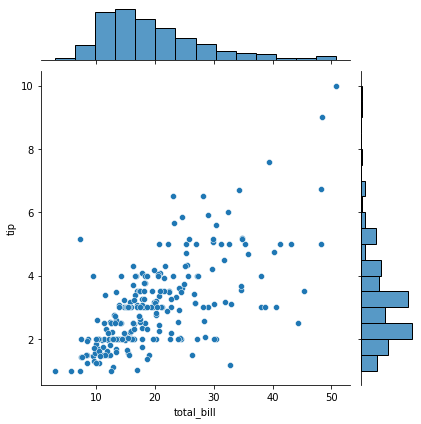

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips)

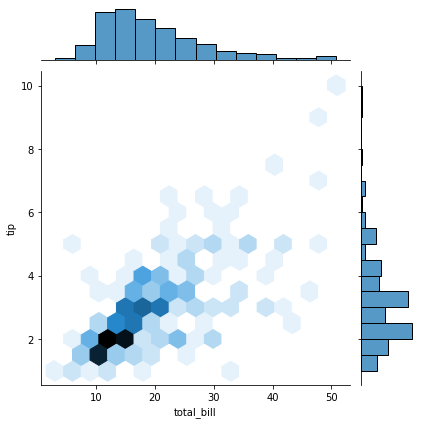

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

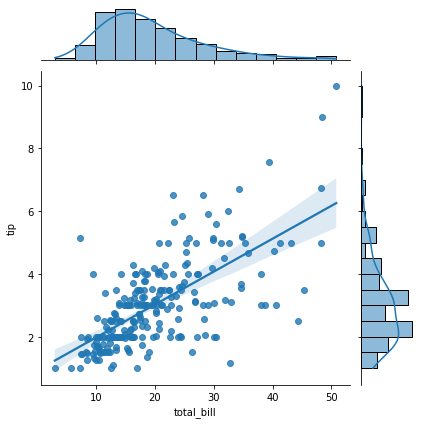

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

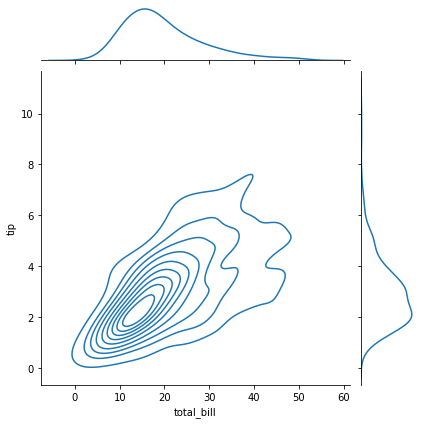

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

What we get is 2 distribution plots:
* Tip along the y axis
* Total_bill on the x axis
* In between there is a **scatter plot** that demonstrates the connection between the 2 variables - and allows us to potentially identify any trends (for instance here shows a trend that makes sense: tips are usually proportional to the total bill)

**The purpose of the jointplot** is to investigate if there is a connection between the 2 variables that we are comparing through the scatter plot. In the above example, we see that the tip usually trends higher the higher the bill is. 


### Third  numerical plot type: pairplot

This plot allows pairwise relationships across an entire dataframe - at least for the **numerical columns**, where it also supports a color_hue argument for categorical columns (non-numerical, like eg here the 'sex' column in tips)

What pairplot is going to do is the same as jointplot but for every single numerical column within the dataframe.

We simply call sns.pairplot( ) and pass in:
* the **dataframe** we want
* the **hue** argument to add the name of a categorical column (ie a column that contains non-numerical, non-continuous data). This will color the datapoints based off of the column we put in for hueing (in this case 'sex', where all the blue points are male, all the orange points are female)
* the **palette** argument, which allows us to color this with a specific color palette - will see more of that later, but Seaborn has its own color palettes we can use

**Note**:
* Pairplots are a super-useful tool to quickly visualise all the data within a dataframe
* We will be doing this **a lot**

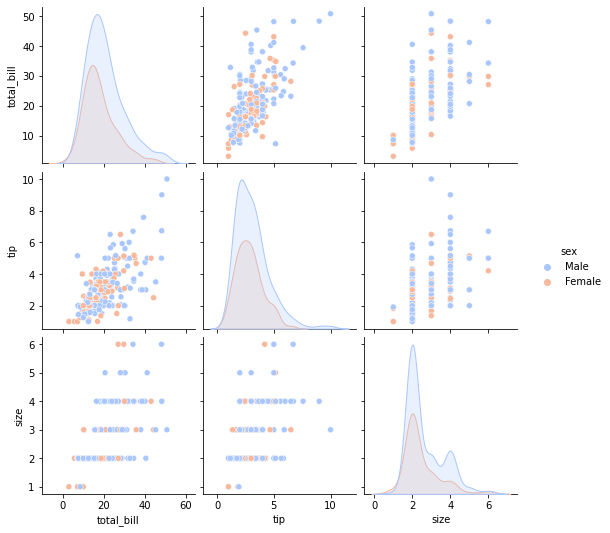

In [12]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

### Fourth  numerical plot type: rugplots

When used, it draws a dash-mark for every single point of a univariant distribution (ie of a single column). Therefore to use them, same as with distplots( ) we pass as argument **a single column**. 
**The difference between rugplots and histograms** is that histograms have bins and it counts how many dashes were in that bin, showing it then as a number. Eg below, between 10 and 11 there are about 40 dashes stacked on top of each other, making it more dense (for the rugplot) or with a higher bin (for the histogram).


<AxesSubplot:xlabel='total_bill'>

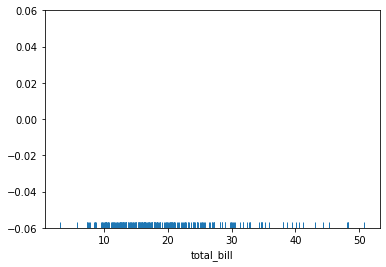

In [13]:
sns.rugplot(tips['total_bill'])

## KDE  numerical plots (Kernel Density Estimation) and how they are constructed from a distplot (using rugplots)

We will use the concept of rugplots to explain what the KDE plots we saw earlier are -- namely how do we build the KDE line based off of the rugplots.

**BASICALLY** each dash from a rugplot can be used to make a normal/Gaussian distribution. **If we sum these normal distributions all up, then it will create the overarching KDE** -- see below, and *don't worry about the code, it's just for the plot below*

(0.0, 1.0)

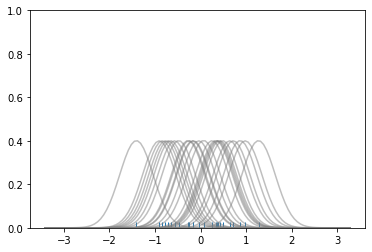

In [14]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Now, to create a normal distribution out of each of the rugplot points:
# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

What we are going to do next is to sum all of these normal distributions up, in order to get the kernel density basis function:

Text(0.5, 0.98, 'Sum of the Basis Functions')

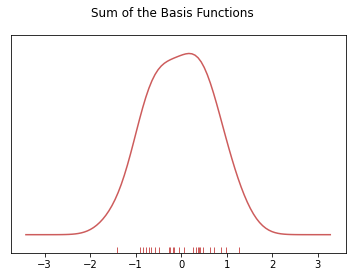

In [15]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

**SUMMARY** : those are all the basic and major ways to visualise data with Seaborn:
- **distplot**: univariant, with or without KDE
- **jointplot**: bivariant, comparing 2 columns from the dataset to show their relation
- **pairplot**: a jointplot for every single numerical column on the dataset, with the option to color the data based on a categorical column
- **rugplot**: mostly used to build the logic for KDE
- **KDE**: the sum of normal distributions for each dash of a rugplot

## Categorical Plots

We are going to discuss how to visualize the relationship between categorical columns and either other categorical or numerical columns

### First categorical plot type: barplots (- and estimators)
A general plot that allows to aggregate the categorical data based off of some function -- by default that is the mean. It can be considered as a visualisation of a Groupby action; grouping columns based on a characteristic.

- We can also change the `estimator` object in order to affect what the actual grouping/aggregation is, ie what is the basis for our grouping- do we look at the average? Something else? The `estimator` is basically a statistical function to estimate within each categorical bin. By default that is going to be average or mean, but if we have our own aggregate function we can use that too.

So, for example:
- In the 1st plot below, we plot the categorical column 'sex' with the numeric column 'total_bill'. This is by default the average/mean of total bill per each value of the categorical column (in this case 'male' and 'female')
- In the 2nd plot below however, we are using **a different estimator as a means of comparison**. Doing so allows us to see what the **new estimator** of the numerical column is per category. The new estimator can be standard deviation, minimum, maximum etc. In the case of the 2nd example below we are looking at the standard deviation in the total bill between the 2 sexes (namely asking is there more standard deviation aka more variants/bigger fluctuation in the total bill made by males compared to females?). This will give what the standard deviation of the 'total_bill' column is per category.

_**Note**: to do so, we need to import numpy in order to use the .std function)_

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

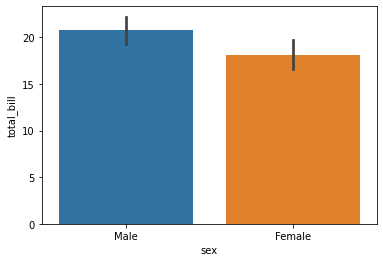

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

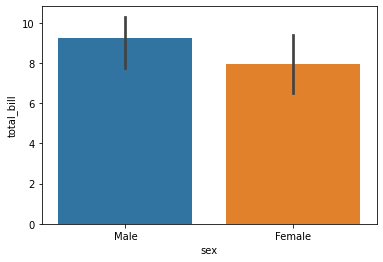

In [17]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

### Second categorical plot type: countplots
Building off of barplots and the estimators, we come to countplots. Countplots are the same as a barplots **with the difference that the estimator is explicitly counting the number of occurences**. Because of that, we only need to define the categorical column, ie **the x value**.

<AxesSubplot:xlabel='sex', ylabel='count'>

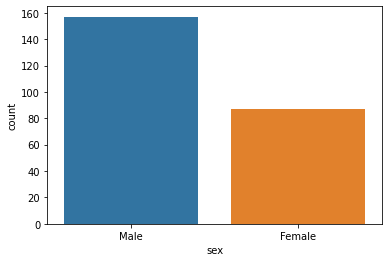

In [18]:
sns.countplot(x='sex',data=tips)

_Note that this is the same as pandas.count off of the database's (`tips`) column for gender_

### Third categorical plot type: boxplots & violin plots (and last basic ones)

#### Box Plots

**How to read a box plot:**
A boxplot shows us how data is distributed. The lowest end of the bottom whisker shows us where the **lowest/min** values lie, the top end of the top whisker shows us where the **highest/max** values lie. The box itself shows us where **most** of the values lie, namely **where about 75% of the values fall**. The **line inside the box** represents the **median** . The **outliers** are values that are significantly **above or below the rest**

These types of plots are used to show the distribution of categorical data.
- Bottom whisker to bottom of box, bottom of box to middle of box, middle of box to top of box, top of box to top whisker: these are 4 segments that cut the data for this particular category (here: day) in **quartiles**
- **quartile** = τεταρτημόριο, each of four equal groups into which a population can be divided according to the distribution of values of a particular variable

**IMPORTANT**: We can **add another categorical column by introducing `hue`**, in order to further split these boxes based on another category

<AxesSubplot:xlabel='day', ylabel='total_bill'>

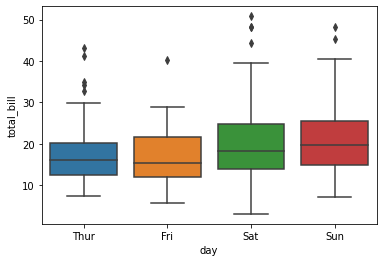

In [19]:
sns.boxplot(x='day',y='total_bill',data=tips)

- The y axis is the total bill
- The x axis is the separated by category, in this case day
- The blue is telling me where lies about **75% of the datapoints for this category** (here:day)
- Whiskers and box and median line 
- The dots above are **outliers**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

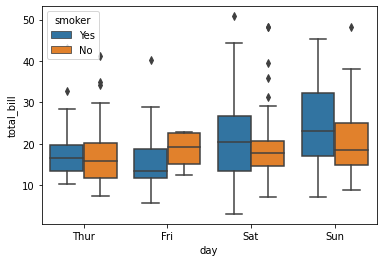

In [20]:
#With hue
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

Above we see a breakdown of the bill not only based by day, but also by whether the customers were smokers or not.

**The `hue` is one of Seaborn's strong assets, allowing to add the hue indicator, adding a new layer of data quickly and smoothly**. Eg above we can say that people on Fridays tend to have a larger bill if they are a smoker compared to non-smokers

#### Violin Plots
Additionally to the information box plots show, violin plots show the distribution of the data across some category so it takes the exact same arguments as box plots (x = 'category' , y = 'numerical column' , data). They also can have `hue` as an argument.

**Key differences with boxplots:**
- Violin plots allow us to plot all the components that correspond **to actual data points**
- **It is essentially showing the KDE of the underlying distribution**
- It is showing more information about the distribution of all the points themselves, information that sometimes might be hidden from us if using a box plot
- If we superimpose the same boxplot, we can understand better what we are looking at:
 - The tips of the black lines within the violin plots are corresponding to the tips of the whiskers
 - The very top and bottom of the violin plot is where the outliers are located
- **SPLIT/DODGE**: When adding a `hue`, since the information on a violin plot is doubled up on each side of the violin, we can have **one half of a violin be one hue and the other be another**. We can achieve that by passing `split = True` as an argument. **IMPORTANT**: Split in later versions for other plots is now also called `dodge`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

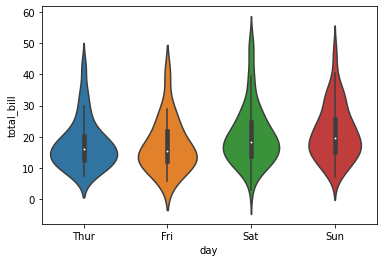

In [21]:
sns.violinplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

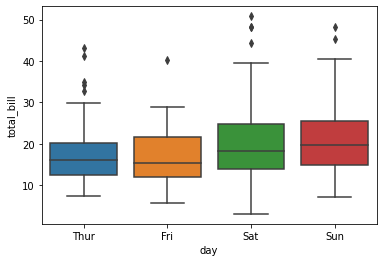

In [22]:
#For comparison, the relevant boxplot
sns.boxplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

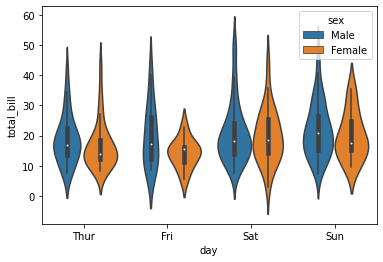

In [23]:
#With hue
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

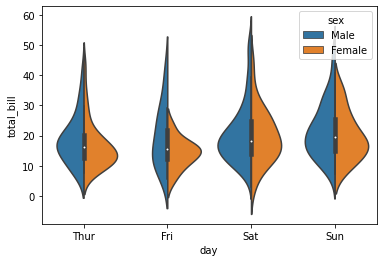

In [24]:
#With split hue
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

### Advanced categorical plot types - useful for Exploratory Data Analysis (EDA)

#### Strip plots:

Strip plots is going to draw a scatter plot over one categorical variable. Namely one variable is categorical, one is numerical (same as with box and violin plots).
- We usually pass the `jitter` argument, in order to add some random, fake noise that will help us read the plot easier 
- We can also use `hue` here, to add another categorical variable in the mix
    - **IMPORTANT** : `split` here works but gives a warning. It is better to use `dodge`

<AxesSubplot:xlabel='day', ylabel='total_bill'>

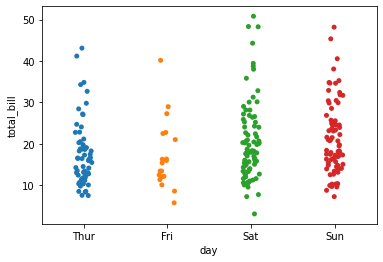

In [25]:
sns.stripplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

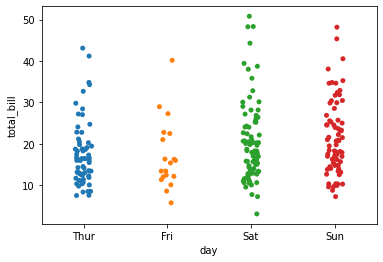

In [26]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

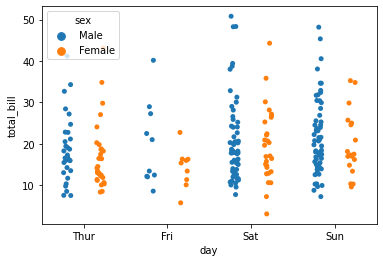

In [27]:
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True, hue='sex', split=True)

#### Swarm plots:

Swarm plots is a combination of the idea of a violin and a strip plot. A swarmplot is similar to a strip plot but they are adjusted so that they don't overlap. That is actually giving a better representation of values.
- **Problems** appear in very large datasets
- We can combine a swarm plot and a violin plot, by plotting both on the same command and then specifying the `color` of the swarm plot to be black
- Same with strip plots, these are more useful for EDA

<AxesSubplot:xlabel='day', ylabel='total_bill'>

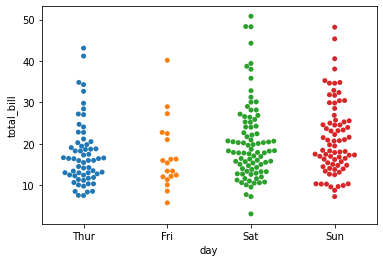

In [28]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

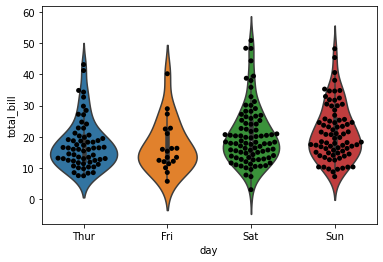

In [29]:
#Combining a swarm and violin plot:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

#### Catplots (older: Factor plots)

Cat/Factor plots is actually the most general form of all these plots. It takes an `x` and `y` , `hue` and `data` arguments, but also it takes in a `kind` argument. This argument describes the factor plot itself. It allows to pass what kind of plot we want to make based on the categories and hues I've passed as arguments eg `kind` = 'violin' .
It is the most general method to call any of the previously explained plots, and we call the individual plots directly, without the general method.
*Note: Factor plots have been renamed to `catplot` and the original name will be removed in a future release - so I get a warning

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


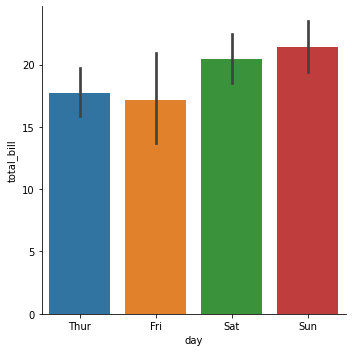

In [30]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

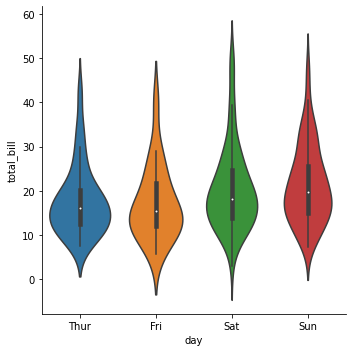

In [31]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

## Matrix Plots

We are going to discuss how to create matrix plots, primarily **heatmaps**

In [32]:
#Loading 2 data sets: the usual 'tips' and the 'flights' one

import seaborn as sns
%matplotlib inline
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [33]:
#'Flights' gives the number of passengers that flew in a given month of a 
#given year
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### First matrix plot: Heatmap
In order for a heatmap to work properly, our data should already be **in a matrix form**. 

**IMPORTANT**: By _matrix form_ we mean that the **index name** and the **column name** match up so that the cell value indicates something that is relevant to both of those names, **ie both columns and cells should be _variables_**

Eg: on the tips dataset (see head above), the `total_bill` column has numerical values, however each **_row_** is **NOT** a variable (the index is 0,1,2...). That means that tips is **NOT** in a matrix form.

We can do that (having both columns and cells as variables) _usually with a **pivot table** or by trying to get **correlation data**_ 

#### 1) Correlation data

**`.corr ( ) ` method**: This is a _Pandas_ method we can apply on a dataframe. Pandas `dataframe.corr()` is used **to find the pairwise correlation of all columns in the dataframe by essentially calculating and returning the _correlation coefficient, ρ_** . 

**correlation coefficient, ρ**: (AKA the Pearson standard correlation coefficient) is a measure of linear correlation between two sets of data. **It is the ratio between the covariance (συνδιακύμανση) of two variables and the product of their standard deviations**; thus **it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1** (see image below)

- Any NA values are _automatically excluded_
- Any non-numeric data type columns in the dataframe are ignored
- By default it returns the Pearson standard correlation coefficient, ρ , but it can also return Kendall's ταυ coefficient (from the known T test) or Spearman's rank correlation
- **The correlation of a variable with itself is 1.** So, wherever the column name = index name, the value of the cell = 1


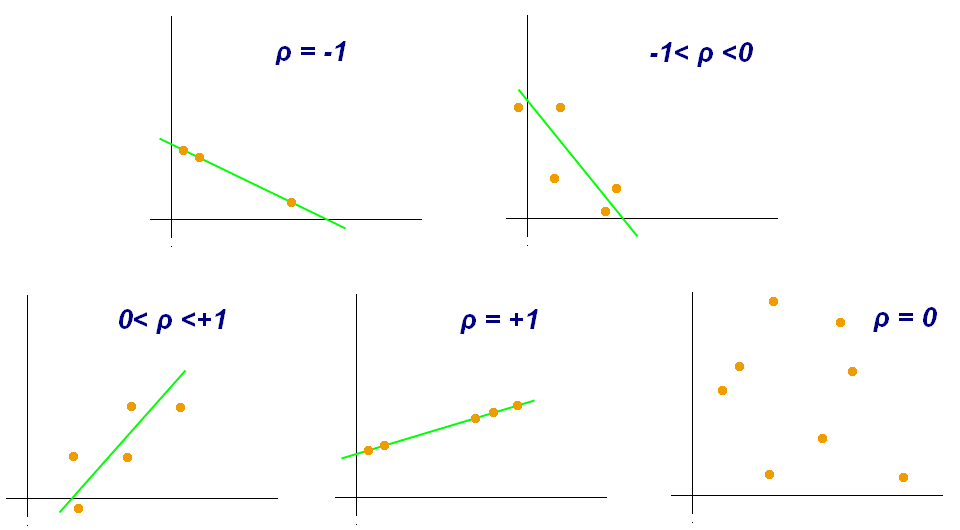

_Examples of scatter diagrams with different values of correlation coefficient ρ_

In [35]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [36]:
#Assigning the correlation data to a variable so I can call it for the heatmap
tc = tips.corr()

#### Heatmap for Correlation data

All a heatmap does is color in the values of a matrix based on a gradient scale, in order to be able to tell what the numbers are to each other based on the color.
- We can pass `annot` = True argument, to annotate the actual numerical values that belong to each of these cells
- We can pass `cmap` to specify the actual colour mapping we want (many in-built different options)

<AxesSubplot:>

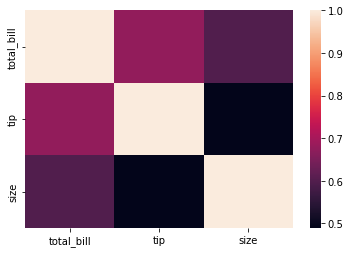

In [37]:
sns.heatmap(tc)

<AxesSubplot:>

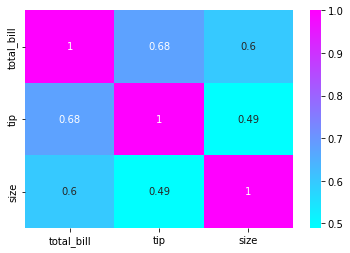

In [38]:
sns.heatmap(tc,annot=True,cmap='cool')

#### 2) Pivot Table

We can create a pivot table by the **.pivot_table( index = , columns = , values = )** method. As `index`, `columns` and `values` arguments we pass the respective columns from the original dataset we want to explore.

Looking at the flights dataset, we can pivot the table as follows: we will use `month` as index, the columns will indicate the `year` and as data we will have the number of `passengers`. 
- As a pivot table, we don't actually change any of the data on the table, we merely 'pivot' the data to see them from a different perspective. 
    - In this case for instance, we see a breakdown of `passengers` per each `month` of each `year` of the dataset.

In [39]:
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [40]:
#Assigning the pivot data to a variable so I can call it for the heatmap
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

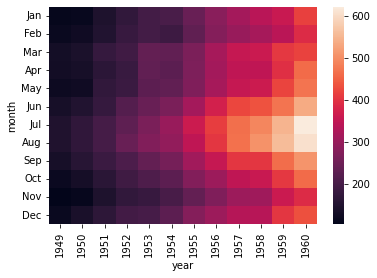

In [41]:
sns.heatmap(fp)

**Note**: We can also pass `linecolor` and `linewidths` arguments to heatmap in order to add separation to the colours of the squares of the heatmap that are otherwise touching each other   

<AxesSubplot:xlabel='year', ylabel='month'>

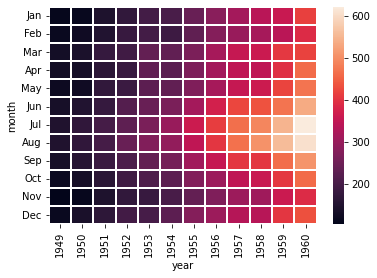

In [42]:
sns.heatmap(fp, linecolor='white',linewidths=2)

### Second matrix plot: Clustermap
Clustermaps use **hierarchical clustering** to produce **a clustered version of a heatmap**, trying to **cluster columns and rows together based on similarity**.

On the example below, we make a clustermap out of the previous pivot table. Both years and months are _out of order_ now, as the ordering has changed so that months that have similar values (for the passengers variable) are put together. **It essentially clusters the information to try and show columns and rows that are similar to each other.**

**Note** We can pass in an argument called `standard_scale` that will normalise the `values` argument of the pivot table (here, the passengers), with 1 being max and 0 being min. That helps greatly with making the differences more visible.

<AxesSubplot:xlabel='year', ylabel='month'>

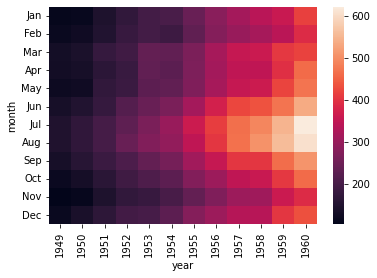

In [43]:
sns.heatmap(fp)

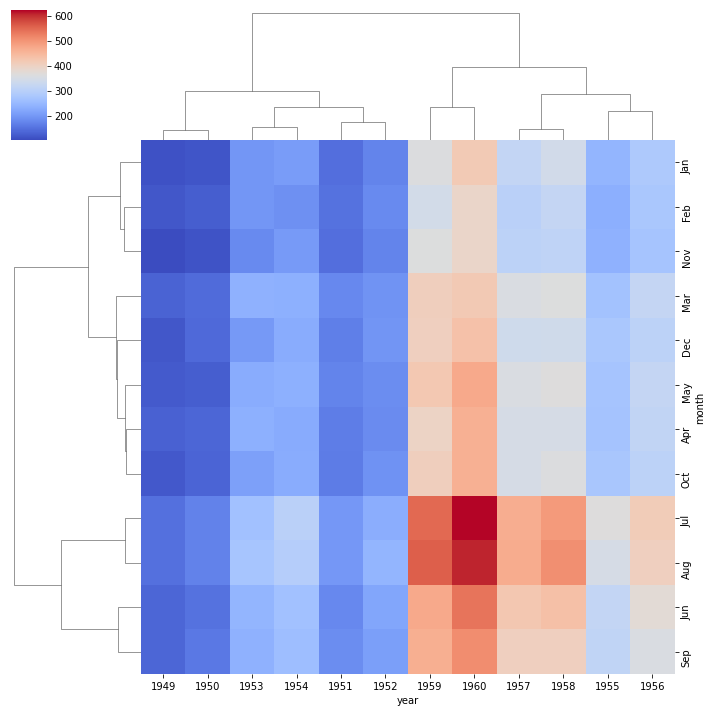

In [44]:
sns.clustermap(fp,cmap='coolwarm')

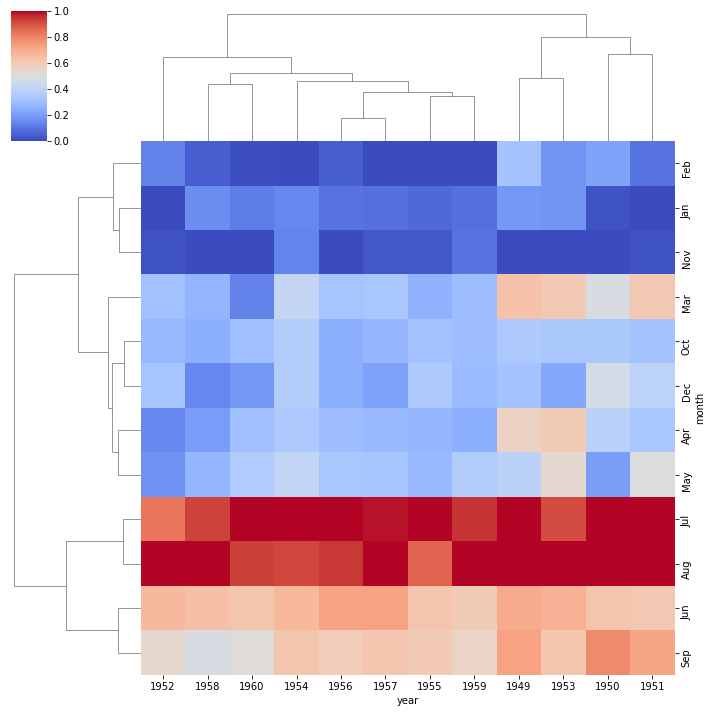

In [45]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

### Heatmap vs Clustermap

- A heatmap will display things in the order we put them in
- A clustermap will cluster things in an order, so that similar groups are close to each other

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [46]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

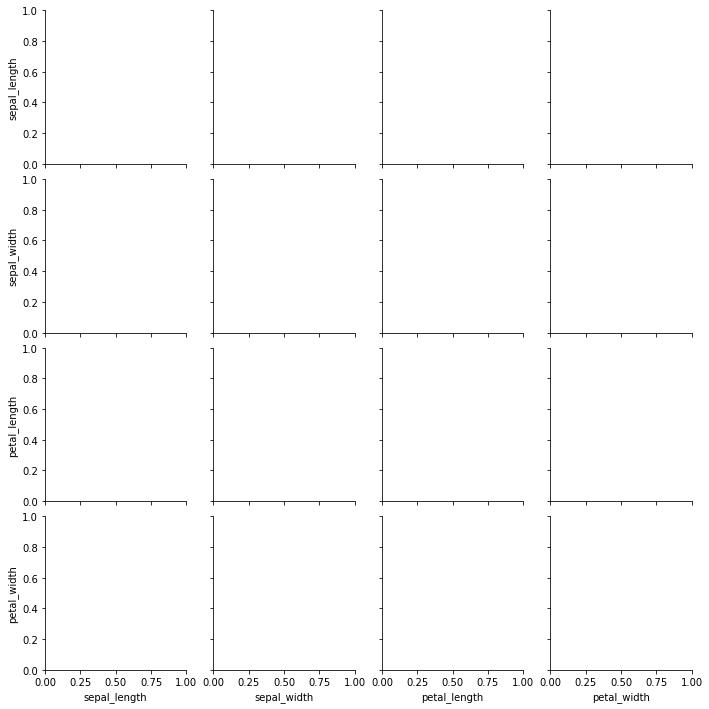

In [47]:
# Just the Grid
sns.PairGrid(iris)

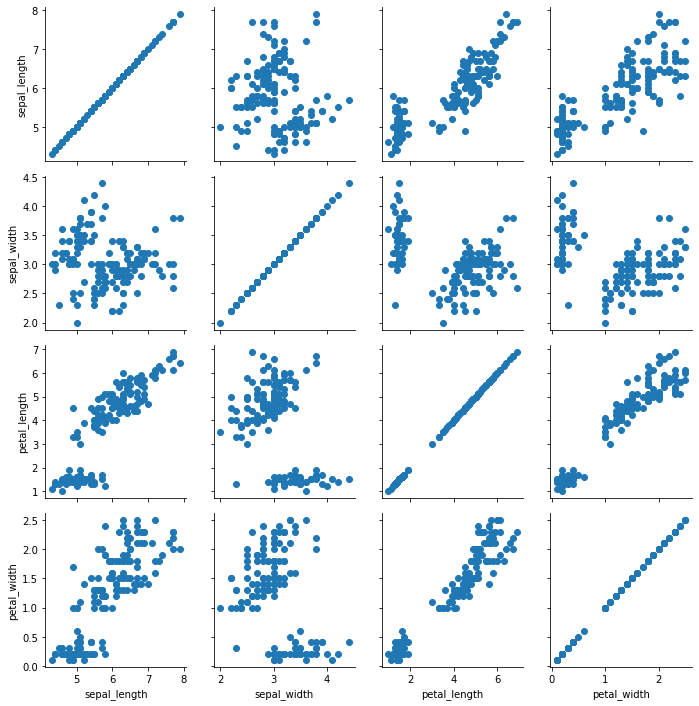

In [48]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

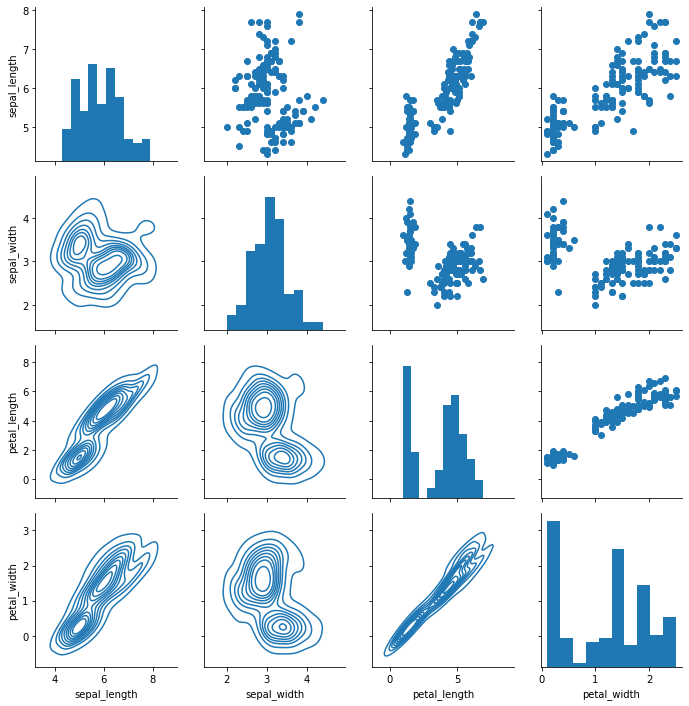

In [49]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Pairplot

pairplot is a simpler version of PairGrid (we'll use quite often -- see earlier section for pairplot)

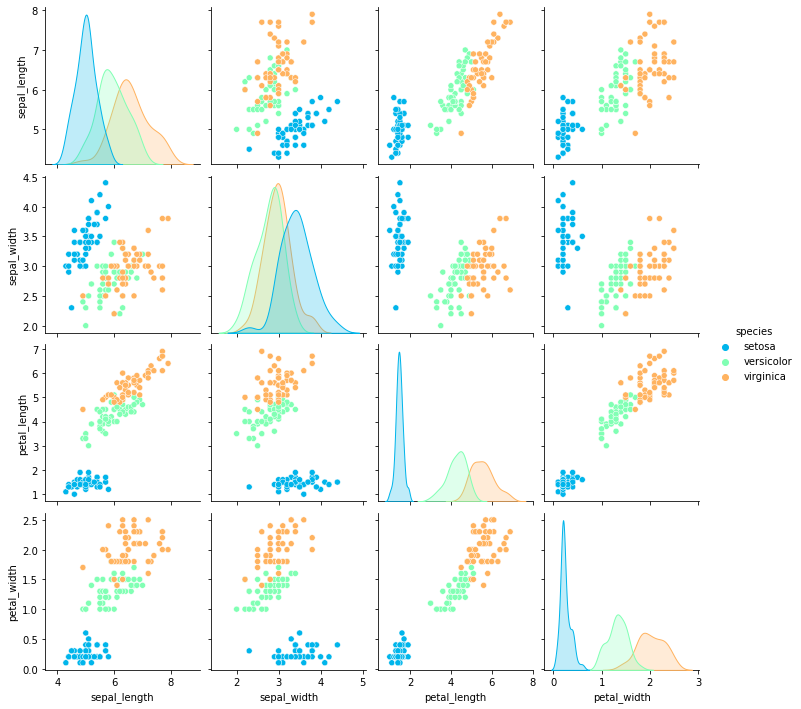

In [50]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

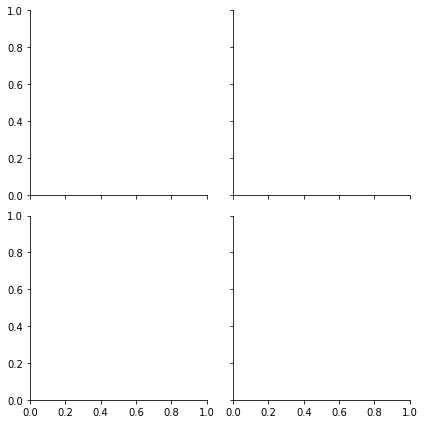

In [51]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

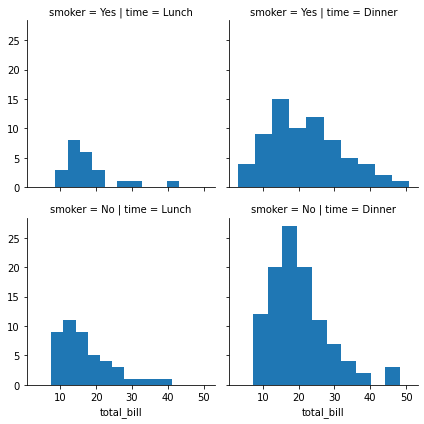

In [52]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

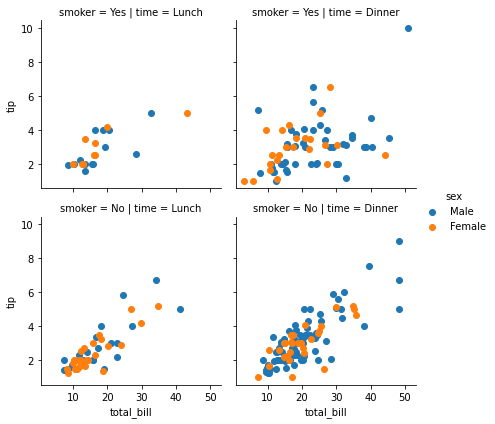

In [53]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

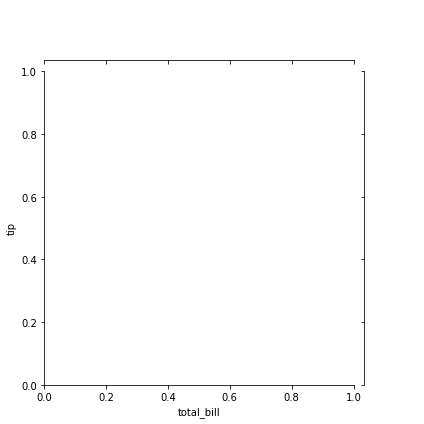

In [54]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dimit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variabl

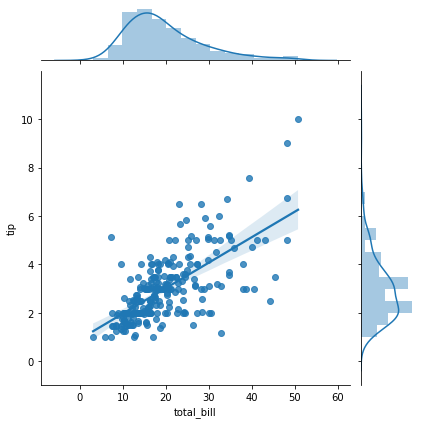

In [55]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Regression Plots

Seaborn has many built-in capabilities for regression plots, however we will discuss regression that much in depth later, in the ML part of the course. For now, we will focus on the LM function.

### LM Plot

LM plot allows to display linear models with Seaborn. We will also learn how to size and change the aspect ratio for Seaborn plots. We call LM plot with the .lmplot( ) method where we pass as main argumets the `x`, `y` and `data`. We get back a scatter plot with a linear fit on top of it (see below). We can also add `hue` to add a categorical variant to the plot.
- We can pass matplotlib style parameters in order to change the markers
- We can add `scatter_kws` parameter to make the markers more visible. To do so, we pass in a dictionary, with the `s` affecting the size of the marker
    - What Seaborn is essentially doing is calling matplotlib under the hood. So, we can affect how matplotlib is called directly through Seaborn to further customize our LM plot
- Instead of `hue` we can use `col` in the same way. This will result in providing separate plots - - considered different columns populated by plots - - based on the category. On the below example, we see `col` = 'sex' leads to 2 columns/plots, one for each value of the categorical variable 'sex' (male and female). **Instead of separating by color (`hue`) we separate by columns (`col`)**
    - **We can continue this logic by adding another variable as `row`s!** (below: time)
- We can change the **aspect ratio** of the plot too. On the last example below, we get quite the informative plotting, but the data is too small to show. So, we pass the `as` argument for that. Aspect ratio manages the ratio between the hight and the width
- We can also change the **size** of the plots by specifying the `height` parameter

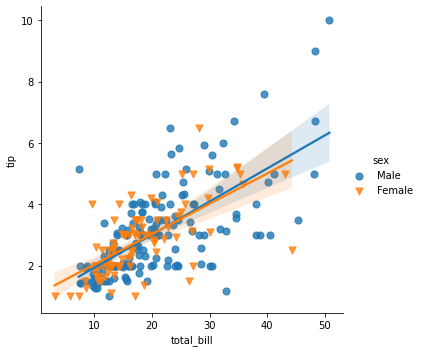

In [56]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':50})

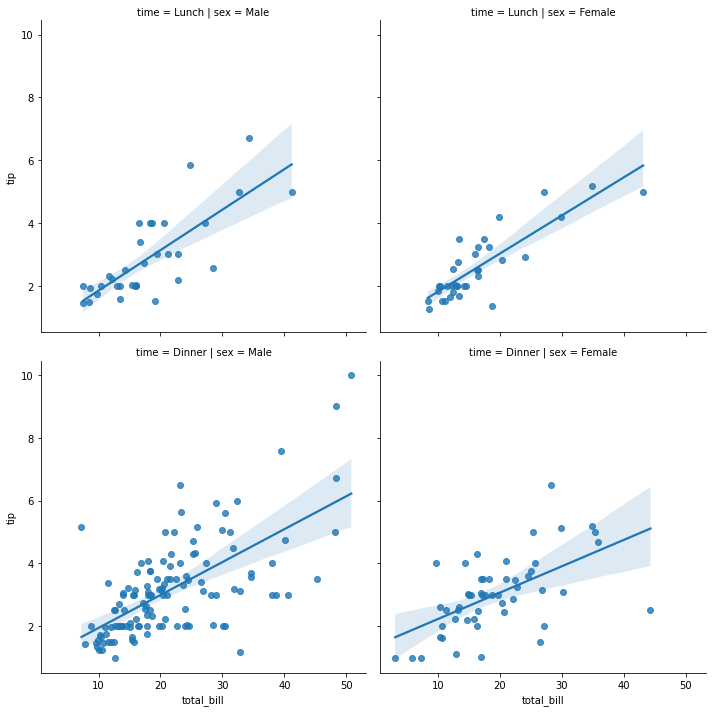

In [57]:
#Rows and columns
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex', row='time')

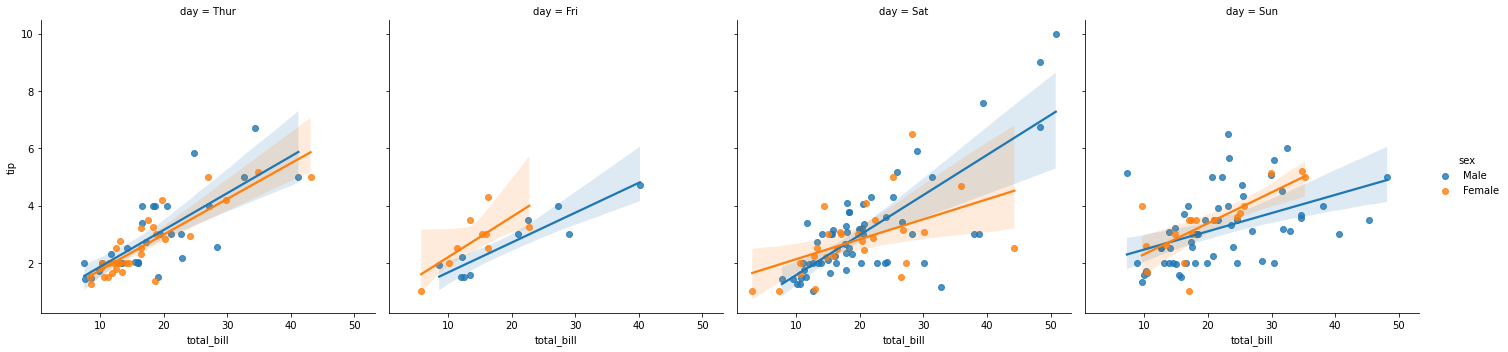

In [58]:
#Aspect ratio - without aspect ratio configuration
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', hue='sex')

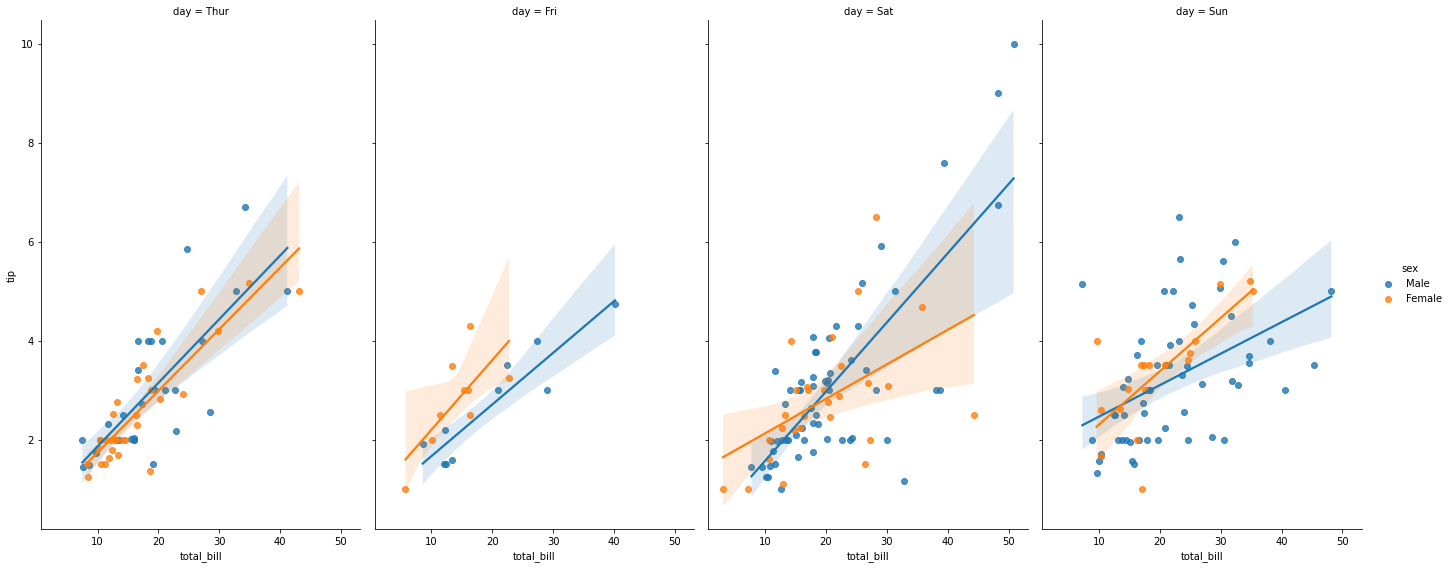

In [59]:
#With Aspect ratio and size configuration 
sns.lmplot(x='total_bill',y='tip',data=tips,col='day', hue='sex',
          aspect=0.6,height=8)

....but the font and colors are not great. Lets fix that!

## Style and Color in Seaborn

### Style and Spines

- **.set_style( )**: Allows to set the style _for the rest of the plots_. We pass arguments for the style : either a dictionary, or one of the following options: darkgrid, whitegrid, dark, white, ticks 
- **.despine( )**: Removes the spine from the plot. Can pass in left=True and bottom=True to remove left and bottom spines too (by default top and right are already true) 

<AxesSubplot:xlabel='sex', ylabel='count'>

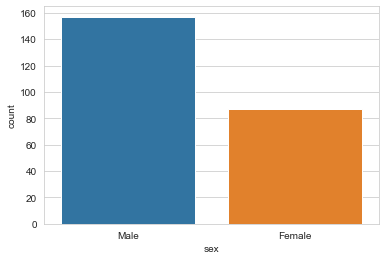

In [60]:
#With spines:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

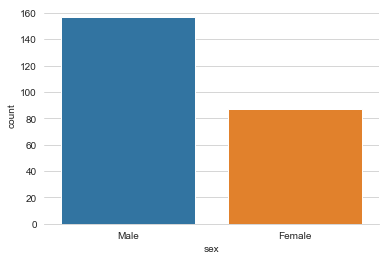

In [61]:
#Without spines:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

### Size and Aspect ratio

- **_plt_.figsize( )**: Allows to change the size (and therefore ratio) of the plot, exactly like in matplotlib
    - **NOTE** that it is a _matplotlib method_, and that it uses the matplotlib callback. Matplotlib sets the size for the plot, then Seaborn builds it

<AxesSubplot:xlabel='sex', ylabel='count'>

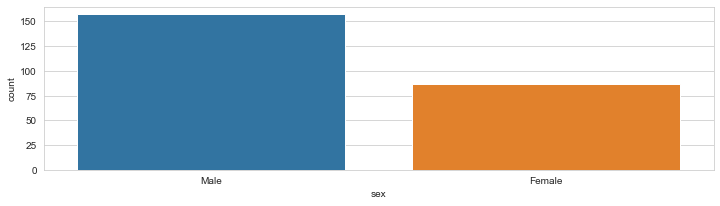

In [62]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

### Scale and Context

- **sns.set_context( )**: Allows to override default parameters and change font scales, depending on what are we actually creating the figure for. It can take as parameters either a dictionary, or one of the following options:paper, notebook, talk, poster
    - If I further want to change the font (not happy with the context I have passed), I can add **font_scale = number** so I can change the size of the font

<AxesSubplot:xlabel='sex', ylabel='count'>

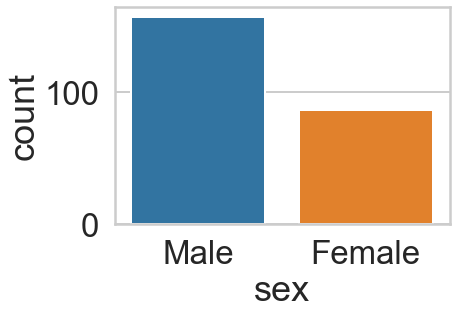

In [109]:
sns.set_context('poster',font_scale=1.5)
sns.countplot(x='sex',data=tips)

### Palettes and Colors

Matplotlib has a page dedicated to color maps (such as 'magma' that we used earlier). Some options are: - _Gradients_ : 'viridis', 'plasma', 'inferno', 'magma', 'cividis', - _Sequential_: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', _Diverging_: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', _Cyclic_: 'twilight', 'twilight_shifted', 'hsv' etc. The link for the page is here: https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

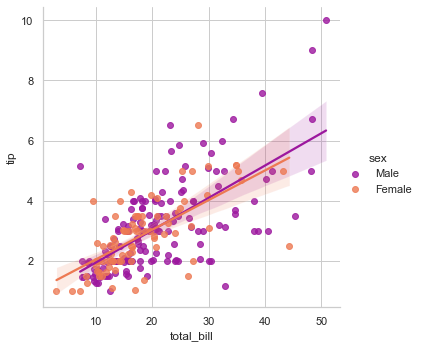

In [115]:
sns.set_context('notebook') #Resetting the context otherwisethe previous would persist

sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='plasma')